In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
### loc_info='No_Loc_info' ## Excluding location information
loc_info='Includ_Loc_info'; ## All features including location information

##################
### Resampling time average  
# tempo_res='1min' 
tempo_res='1S'

In [3]:
### import data
if tempo_res=='1min':
    df = pd.read_pickle('Data/Cinderella_Weatheres_1min_data.pkl')
if tempo_res=='1S':
    df = pd.read_pickle('Data/Cinderella_Weatheres_1S_data.pkl')

df.shape

(243688, 70)

In [4]:
import os

# Get current working directory
current_dir = os.getcwd()

print("Current directory:", current_dir)

# Output_folder='Outputs_Cinderella_cluster_Analysis_v1'
Output_folder='Outputs_Cinderella_cluster_Analysis_v2'



Current directory: C:\Users\mohabu\iHelm\Cinderella_Clustering


In [5]:
## Create the output folder
folder_path = r''+Output_folder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

### Postprocessing data

In [6]:
# st=stop
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,wavedirect,Temp_2m,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,151.301651,293.959625,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,151.303497,293.959625,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,151.305344,293.959625,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,151.307190,293.959625,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,151.309036,293.959625,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,206.433884,282.306488,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,206.434097,282.306549,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,206.434296,282.306580,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0


#### Modify Course and wind direction measurments

In [7]:
# df.columns

In [8]:
df['courseOverGroundTrue']= df.course_over_ground_true
df['windDirectionTrue']= df.wind_direction_true

df[['courseOverGroundTrue','windDirectionTrue']].describe()

,courseOverGroundTrue,windDirectionTrue
count,243688.000000,243688.000000
mean,178.397720,176.315674
std,91.753745,96.435665
min,0.048700,0.000000
25%,99.722948,101.645594
50%,171.795700,174.893483
75%,270.592938,261.916912
max,359.892000,359.892000


In [9]:
dforig=df
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry,courseOverGroundTrue,windDirectionTrue
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0,171.795700,160.576217
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,156.996200
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0,171.795700,153.420925
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,149.662333
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0,171.795700,151.495800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0,127.806862,210.930100
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0,173.826817,206.375550
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0,169.127583,207.490900


In [10]:
# st=stop

### Postprocessing data

In [11]:
df=dforig
df.shape

(243688, 72)

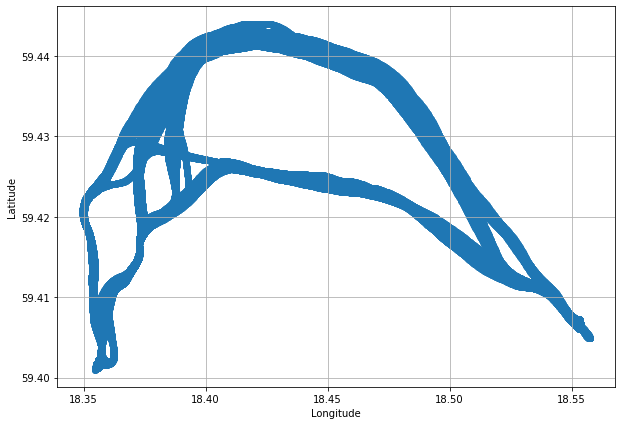

In [12]:
# Create a scatter plot of latitude and longitude to visualize the ferry's path
fig = plt.figure(figsize=(10,7))
plt.scatter(dforig['longitude'], dforig['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig(Output_folder+'/Scatter_dforig_lat_lon_paths_'+tempo_res+'.png', dpi=500)  

plt.show()

In [13]:
# st=stop

In [14]:
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South                 104308
North_Middle_Upper     66628
North_West_Upper       26867
North_East_Lower       26311
North_Middle_Lower     11407
South_West              4408
North_West_Lower        3759
Name: direction, dtype: int64

### Merging and changing names of some paths (minority paths with slight difference)

In [15]:
df['direction'] = df['direction'].replace('North_West_Upper', 'North_West')
df['direction'] = df['direction'].replace('North_West_Lower', 'North_West')

df['direction'] = df['direction'].replace('North_East_Lower', 'North_East')
df['direction'] = df['direction'].replace('North_Middle_Upper', 'North_Middle')
df['direction'] = df['direction'].replace('North_Middle_Lower', 'North_Middle')

# Check the new unique values
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64

In [16]:
dforig1=df
dforig2=df
dforig3=df

In [17]:
# df = df[['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue',
#               'distanceFromDock', 'distanceToNextDock', 'distanceToPreviousDock', 
#               'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg', 'EngineFuelRate',
#               'windSpeedOverGround', 'windDirectionTrue',  'windSpeed','windDirection', 
#               'waveheight', 'wavedirect','currentSpeed', 'currentDirection',
#               'windSpeed_sg', 'windDirection_sg', 'Temp_2m', 'Temp_surf',
#        'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
#          'iceCover', 'swellHeight', 'secondarySwellHeight','waterTemperature',
#          'direction']]


df['pathSelection']=df.direction

In [18]:
df.shape

(243688, 73)

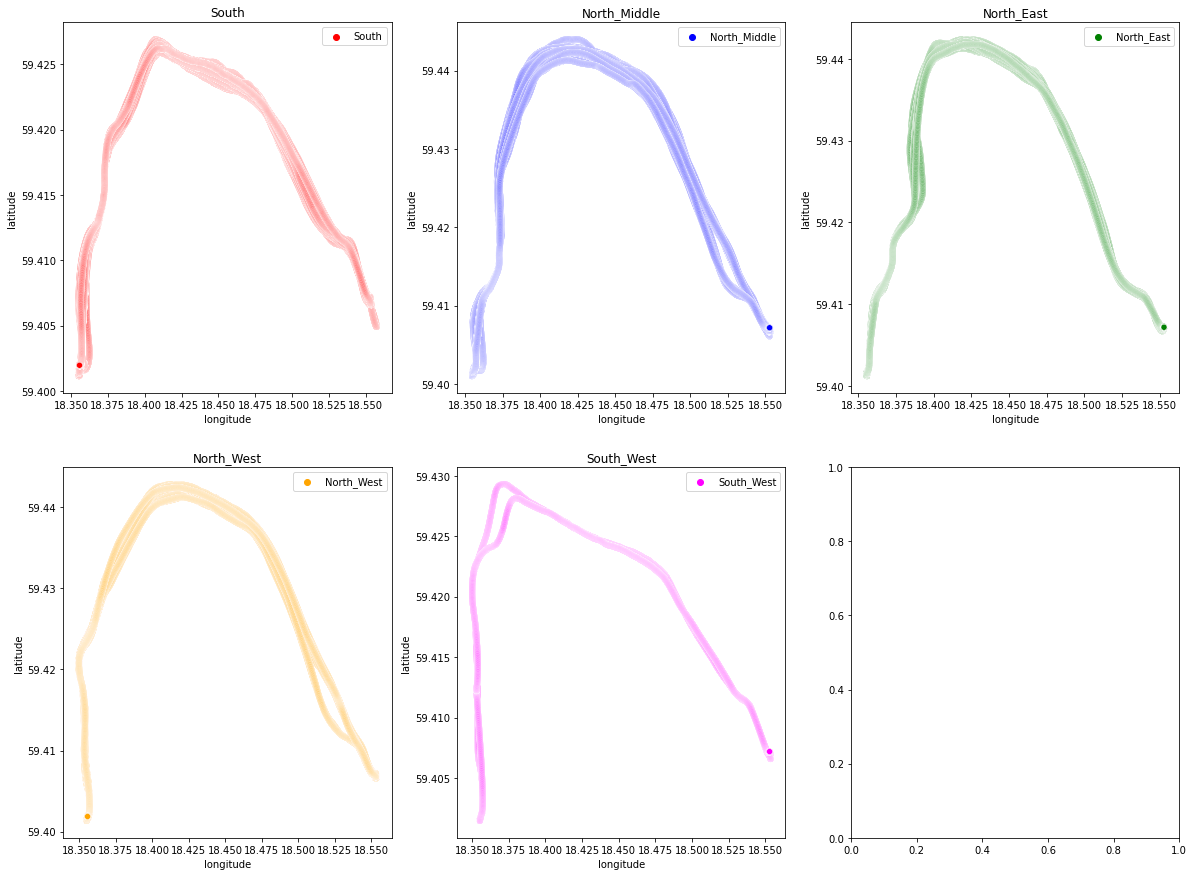

In [19]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for both paths
import matplotlib.ticker as ticker
fig_scatter_actual_paths, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='South'], ax=axes[0,0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_Middle'], ax=axes[0,1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_East'], ax=axes[0,2],  palette=['green'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='North_West'], ax=axes[1,0],  palette=['orange'])
sns.scatterplot(x='longitude', y='latitude', hue='direction', data=df[df['direction']=='South_West'], ax=axes[1,1],  palette=['magenta'])

# # Set number format for axis ticks
# for ax in axes:
#     ax.ticklabel_format(useOffset=False, style='plain')


axes[0,0].set_title('South')
axes[0,1].set_title('North_Middle')
axes[0,2].set_title('North_East')
axes[1,0].set_title('North_West')
axes[1,1].set_title('South_West')

axes[0,0].legend(title='')
axes[0,1].legend(title='')
axes[0,2].legend(title='')
axes[1,0].legend(title='')
axes[1,1].legend(title='')

fig_scatter_actual_paths.savefig(Output_folder+'/ScatterPlot_acutal_5paths_'+tempo_res+'.png')  

plt.show()

In [20]:
# dforig[(dforig.RT_id==1308) & (dforig.Direct_RT==0)].longitude
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

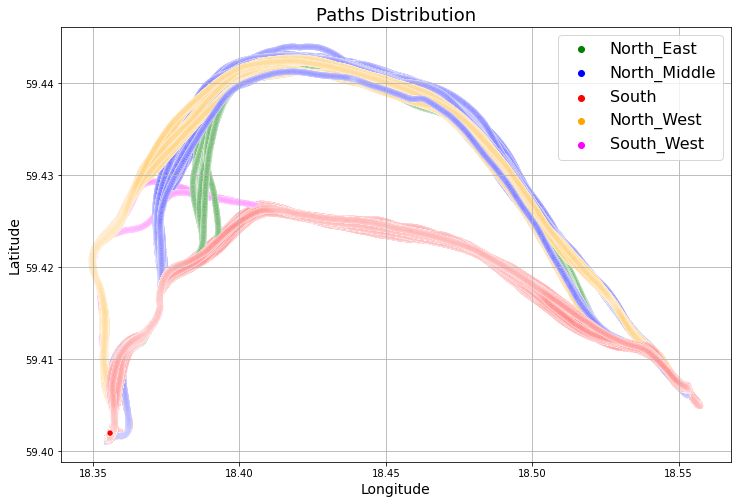

In [21]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for all path classes in a single plot
fig = plt.figure(figsize=(12, 8))

# Use the 'hue' parameter to specify the path selection class
sns.scatterplot(x='longitude', y='latitude', hue='direction', 
                data=df, legend='full', palette=['green', 'blue', 'red', 'orange','magenta'])


# Set title
plt.title('Paths Distribution', fontsize=18)

plt.legend(fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.grid()

plt.savefig(Output_folder+'/ScatterPlot_Colorful_paths_'+tempo_res+'.png')  

plt.show()

In [22]:
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

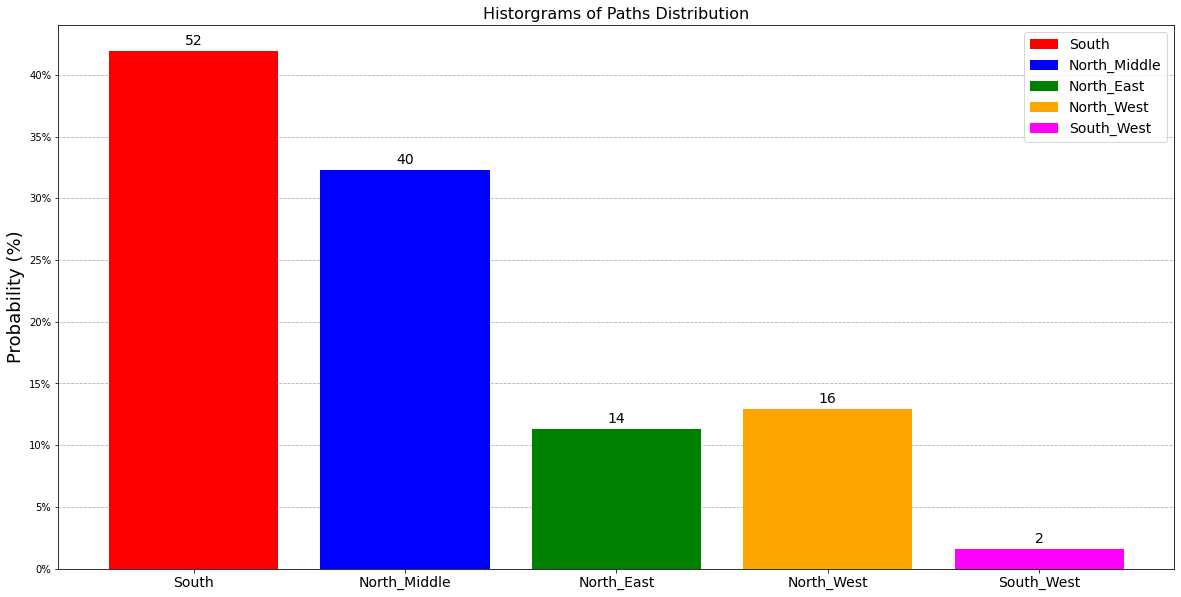

In [23]:
# train_df.groupby(['RT_id']).mean()
rt_class=[]
rt_class=df.groupby('RT_id')['direction'].first()

# Calculate the probability distribution of each path class
prob_dist = rt_class.value_counts(normalize=True)
counts = rt_class.value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)


# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']

labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.005, str(counts[labels[i]]), ha='center', fontsize=14)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)


# Set the title and legend
ax.set_title('Historgrams of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
plt.ylabel('Probability (%)',fontsize=18)

ax.legend(fontsize=14)
ax.grid(axis='y', linestyle='--', zorder=0)


plt.savefig(Output_folder+'/Hist_5paths.png', dpi=500)  

plt.show()


In [24]:
# st=stop

In [25]:
df=dforig2
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64

In [26]:
df.columns

Index(['engine_rpm', 'engine_fuel_rate', 'latitude', 'longitude',
       'latitude_can0', 'longitude_can0', 'heading_magnetic', 'heading_true',
       'course_over_ground_true', 'speed_over_ground',
       'wind_speed_over_ground', 'wind_direction_true', 'wind_speed_apparent',
       'wind_direction_apparent', 'rate_of_turn', 'magnetic_variation',
       'pitch', 'roll', 'temperature', 'atmospheric_pressure',
       'engine_trip_fuel', 'satellites', 'delta_distance', 'delta_timestamp',
       'fuel_per_step', 'fuel_per_step_engine_trip', 'acceleration',
       'wind_speed_apparent_calculated', 'wind_direction_apparent_calculated',
       'course_heading_diff', 'distance_from_dock', 'leg_id',
       'distance_to_next_dock', 'distance_to_previous_dock', 'segment_id',
       'accum_fuel_leg', 'accum_dist_leg', 'accum_time_leg', 'month', 'day',
       'hour', 'RT_id', 'sailing_state', 'closest_dock', 'segment_state',
       'leg', 'leg_uuid', 'segment_uuid', 'direction', 'windSpeed_sg',
  

In [27]:
#### Change the names of some columns

feature_new = ['speedOverGround', 'courseOverGroundTrue','rateOfTurn',
               'distanceToPreviousDock', 'distanceToNextDock', 'distanceFromDock', 'accumDistLeg', 
                'windSpeed_Onb', 'windDirection_Onb',
                 'waveHeight', 'waveDirection']

features_old = ['speed_over_ground', 'course_over_ground_true', 'rate_of_turn',
                 'distance_to_previous_dock', 'distance_to_next_dock', 'distance_from_dock', 'accum_dist_leg', 
                 'wind_speed_over_ground', 'wind_direction_true',
                 'waveheight', 'wavedirect']

# df[feature_new]=df[features_old]

# create a dictionary of old and new feature names using a dictionary comprehension
feature_map = {old_name: new_name for old_name, new_name in zip(features_old, feature_new)}

# use the rename() method to change the column names based on the feature_map dictionary
df = df.rename(columns=feature_map)
df = df.loc[:,~df.columns.duplicated()]  ### drop duplicated columns
df.columns

Index(['engine_rpm', 'engine_fuel_rate', 'latitude', 'longitude',
       'latitude_can0', 'longitude_can0', 'heading_magnetic', 'heading_true',
       'courseOverGroundTrue', 'speedOverGround', 'windSpeed_Onb',
       'windDirection_Onb', 'wind_speed_apparent', 'wind_direction_apparent',
       'rateOfTurn', 'magnetic_variation', 'pitch', 'roll', 'temperature',
       'atmospheric_pressure', 'engine_trip_fuel', 'satellites',
       'delta_distance', 'delta_timestamp', 'fuel_per_step',
       'fuel_per_step_engine_trip', 'acceleration',
       'wind_speed_apparent_calculated', 'wind_direction_apparent_calculated',
       'course_heading_diff', 'distanceFromDock', 'leg_id',
       'distanceToNextDock', 'distanceToPreviousDock', 'segment_id',
       'accum_fuel_leg', 'accumDistLeg', 'accum_time_leg', 'month', 'day',
       'hour', 'RT_id', 'sailing_state', 'closest_dock', 'segment_state',
       'leg', 'leg_uuid', 'segment_uuid', 'direction', 'windSpeed_sg',
       'windDirection_sg', 'cu

### Merging and changing names of some paths (minority paths with slight difference)

In [28]:
df['Path_7classes']=df['direction'] 

In [29]:
df['direction'] = df['direction'].replace('North_West_Upper', 'North_West')
df['direction'] = df['direction'].replace('North_West_Lower', 'North_West')

df['direction'] = df['direction'].replace('North_East_Lower', 'North_East')
df['direction'] = df['direction'].replace('North_Middle_Upper', 'North_Middle')
df['direction'] = df['direction'].replace('North_Middle_Lower', 'North_Middle')


df['Path_class']=df['direction'] 

# Check the new unique values
df.Path_class.unique()
print(df['Path_class'].value_counts().sum())
df['Path_class'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: Path_class, dtype: int64

#### Routes Analysis and Visulaization

In [30]:
df['Date_col']=df.index

(243688, 75)
Paths= [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123.]
number of paths= 124


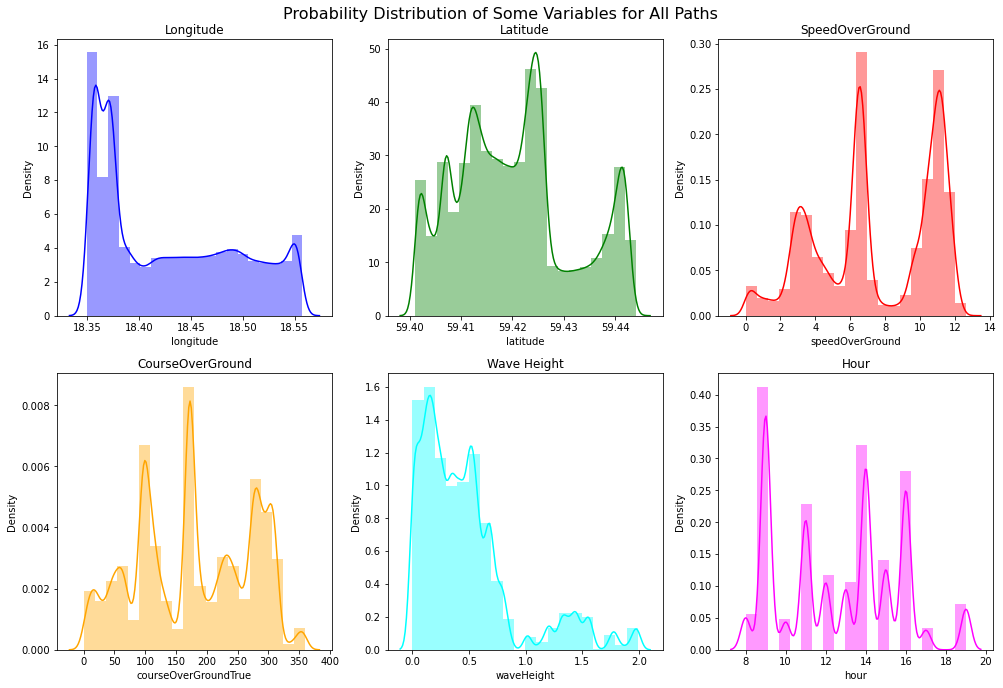

In [31]:
import seaborn as sns
dfplot=df
print(dfplot.shape)

dfplot['date'] = dfplot.Date_col
dfplot['month'] = dfplot.Date_col.dt.month
dfplot['day'] = dfplot.Date_col.dt.day
dfplot['hour'] = dfplot.Date_col.dt.hour

print('Paths=', dfplot.RT_id.unique())
print('number of paths=', len(dfplot.RT_id.unique()))

# plot histograms to visualize the distribution of the variables
plt.figure(figsize=(14, 14))
plt.suptitle("Probability Distribution of Some Variables for All Paths", fontsize=16)



plt.subplot(3, 3, 1)
sns.distplot(dfplot["longitude"], bins=20, color="b")
plt.title("Longitude")

plt.subplot(3, 3, 2)
sns.distplot(dfplot["latitude"], bins=20, color="g")
plt.title("Latitude")

plt.subplot(3, 3, 3)
sns.distplot(dfplot["speedOverGround"], bins=20, color="r")
plt.title("SpeedOverGround")

plt.subplot(3, 3, 4)
sns.distplot(dfplot["courseOverGroundTrue"], bins=20, color="orange")
plt.title("CourseOverGround")

plt.subplot(3, 3, 5)
sns.distplot(dfplot["waveHeight"], bins=20, color="cyan")
plt.title("Wave Height")

plt.subplot(3, 3, 6)
sns.distplot(dfplot["hour"], bins=20, color="magenta")
plt.title("Hour")


plt.tight_layout()
plt.savefig(Output_folder+'/ProbDistPlots_allpaths.png', dpi=500)  


plt.show()

(108716, 76)
Paths= [  7.   9.  11.  14.  20.  21.  22.  23.  24.  25.  30.  32.  36.  39.
  41.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  55.  61.
  65.  72.  74.  75.  77.  79.  82.  88.  94.  98. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123.]
number of paths= 54


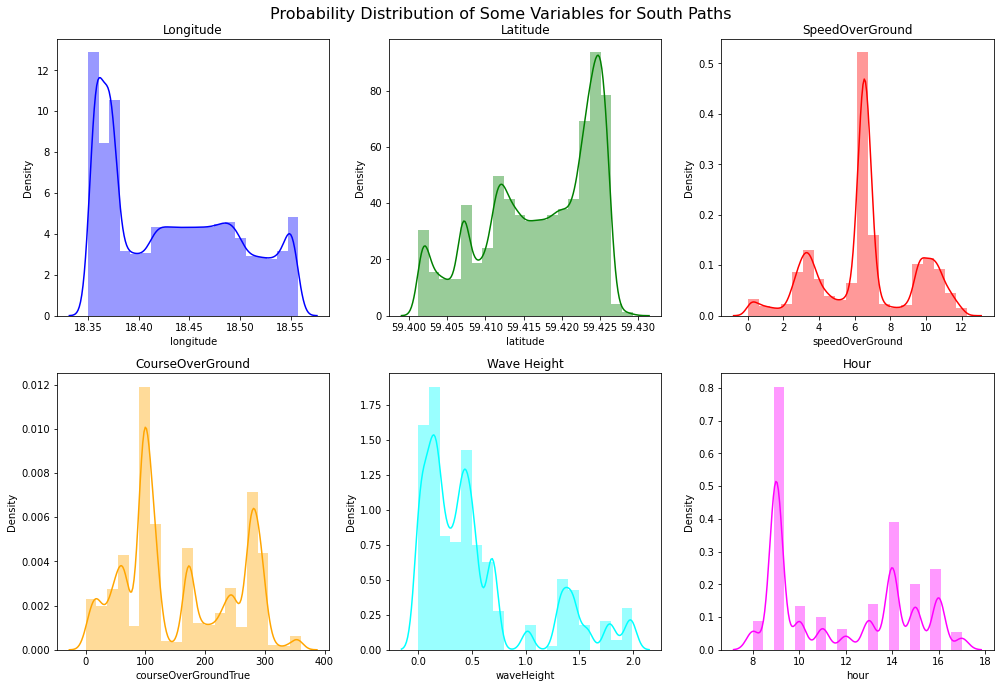

In [32]:
dfplot=df[(df.direction=='South') | (df.direction=='South_West')]
print(dfplot.shape)


dfplot['date'] = dfplot.Date_col
dfplot['month'] = dfplot.Date_col.dt.month
dfplot['day'] = dfplot.Date_col.dt.day
dfplot['hour'] = dfplot.Date_col.dt.hour

print('Paths=', dfplot.RT_id.unique())
print('number of paths=', len(dfplot.RT_id.unique()))

# plot histograms to visualize the distribution of the variables
plt.figure(figsize=(14, 14))
plt.suptitle("Probability Distribution of Some Variables for South Paths", fontsize=16)



plt.subplot(3, 3, 1)
sns.distplot(dfplot["longitude"], bins=20, color="b")
plt.title("Longitude")

plt.subplot(3, 3, 2)
sns.distplot(dfplot["latitude"], bins=20, color="g")
plt.title("Latitude")

plt.subplot(3, 3, 3)
sns.distplot(dfplot["speedOverGround"], bins=20, color="r")
plt.title("SpeedOverGround")

plt.subplot(3, 3, 4)
sns.distplot(dfplot["courseOverGroundTrue"], bins=20, color="orange")
plt.title("CourseOverGround")

plt.subplot(3, 3, 5)
sns.distplot(dfplot["waveHeight"], bins=20, color="cyan")
plt.title("Wave Height")

plt.subplot(3, 3, 6)
sns.distplot(dfplot["hour"], bins=20, color="magenta")
plt.title("Hour")


plt.tight_layout()
plt.savefig(Output_folder+'/ProbDistPlots_South_paths.png', dpi=500)  


plt.show()

(134972, 76)
Paths= [  0.   1.   2.   3.   4.   5.   6.   8.  10.  12.  13.  15.  16.  17.
  18.  19.  26.  27.  28.  29.  31.  33.  34.  35.  37.  38.  40.  42.
  54.  56.  57.  58.  59.  60.  62.  63.  64.  66.  67.  68.  69.  70.
  71.  73.  76.  78.  80.  81.  83.  84.  85.  86.  87.  89.  90.  91.
  92.  93.  95.  96.  97.  99. 100. 101. 102. 103. 104. 105. 106. 107.]
number of paths= 70


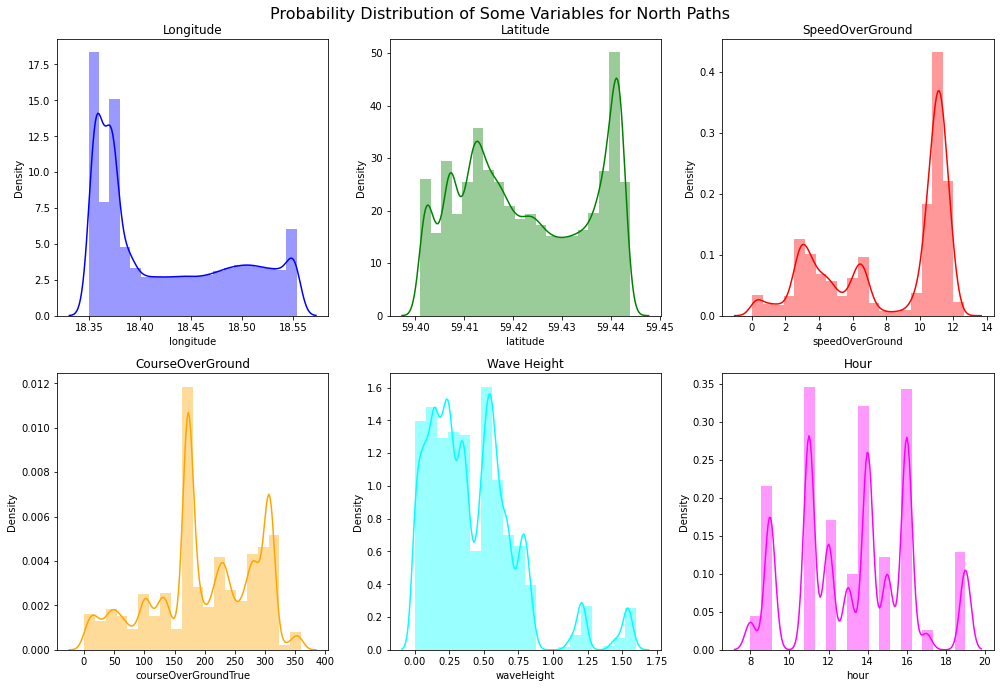

In [33]:
dfplot=df[(df.direction=='North_West') | (df.direction=='North_Middle') | (df.direction=='North_East')]
print(dfplot.shape)


dfplot['date'] = dfplot.Date_col
dfplot['month'] = dfplot.Date_col.dt.month
dfplot['day'] = dfplot.Date_col.dt.day
dfplot['hour'] = dfplot.Date_col.dt.hour

print('Paths=', dfplot.RT_id.unique())
print('number of paths=', len(dfplot.RT_id.unique()))

# plot histograms to visualize the distribution of the variables
plt.figure(figsize=(14, 14))
plt.suptitle("Probability Distribution of Some Variables for North Paths", fontsize=16)


plt.subplot(3, 3, 1)
sns.distplot(dfplot["longitude"], bins=20, color="b")
plt.title("Longitude")

plt.subplot(3, 3, 2)
sns.distplot(dfplot["latitude"], bins=20, color="g")
plt.title("Latitude")

plt.subplot(3, 3, 3)
sns.distplot(dfplot["speedOverGround"], bins=20, color="r")
plt.title("SpeedOverGround")

plt.subplot(3, 3, 4)
sns.distplot(dfplot["courseOverGroundTrue"], bins=20, color="orange")
plt.title("CourseOverGround")

plt.subplot(3, 3, 5)
sns.distplot(dfplot["waveHeight"], bins=20, color="cyan")
plt.title("Wave Height")

plt.subplot(3, 3, 6)
sns.distplot(dfplot["hour"], bins=20, color="magenta")
plt.title("Hour")


plt.tight_layout()
plt.savefig(Output_folder+'/ProbDistPlots_North_paths.png', dpi=500)  


plt.show()

### Plot  the histograms for fuel, time, distance, speed from different paths

In [34]:
df_ftds=df
print(df.shape)
print(df_ftds.shape)

(243688, 76)
(243688, 76)


In [35]:
df_ftds.columns

Index(['engine_rpm', 'engine_fuel_rate', 'latitude', 'longitude',
       'latitude_can0', 'longitude_can0', 'heading_magnetic', 'heading_true',
       'courseOverGroundTrue', 'speedOverGround', 'windSpeed_Onb',
       'windDirection_Onb', 'wind_speed_apparent', 'wind_direction_apparent',
       'rateOfTurn', 'magnetic_variation', 'pitch', 'roll', 'temperature',
       'atmospheric_pressure', 'engine_trip_fuel', 'satellites',
       'delta_distance', 'delta_timestamp', 'fuel_per_step',
       'fuel_per_step_engine_trip', 'acceleration',
       'wind_speed_apparent_calculated', 'wind_direction_apparent_calculated',
       'course_heading_diff', 'distanceFromDock', 'leg_id',
       'distanceToNextDock', 'distanceToPreviousDock', 'segment_id',
       'accum_fuel_leg', 'accumDistLeg', 'accum_time_leg', 'month', 'day',
       'hour', 'RT_id', 'sailing_state', 'closest_dock', 'segment_state',
       'leg', 'leg_uuid', 'segment_uuid', 'direction', 'windSpeed_sg',
       'windDirection_sg', 'cu

In [36]:
df_ftds[['accum_fuel_leg', 'accumDistLeg', 'accum_time_leg', 'speedOverGround']].describe()

,accum_fuel_leg,accumDistLeg,accum_time_leg,speedOverGround
count,243688.000000,243688.000000,243688.000000,243688.000000
mean,62.295982,7506.200831,985.519364,7.394861
std,45.309545,4781.604733,572.829142,3.350154
min,0.001125,0.066755,0.300000,0.000000
25%,24.097479,3053.844653,491.100000,4.470000
50%,54.669153,7443.165993,982.350000,6.750000
75%,98.923394,11832.612040,1473.750000,10.800000
max,162.213417,15909.664728,2322.150000,12.625933


In [37]:
#### Calculate the average speed for each path
avg_speeds = df_ftds.groupby('RT_id')['speedOverGround'].mean()
df_ftds['SOG_avg'] = df_ftds['RT_id'].map(avg_speeds)
df_ftds['SOG_avg'].fillna(method='ffill', inplace=True)

In [38]:
df_ftds['fuel_total']=df_ftds['accum_fuel_leg']
df_ftds['distance_total']=df_ftds['accumDistLeg']/1000
df_ftds['time_total']=df_ftds['accum_time_leg']/60                                            

df_ftds[['RT_id', 'fuel_total', 'distance_total', 'time_total', 'SOG_avg', 'direction']]

,RT_id,fuel_total,distance_total,time_total,SOG_avg,direction
date,,,,,,
2022-07-01 08:54:52,0.0,0.013583,0.000375,0.0100,8.067228,North_East
2022-07-01 08:54:53,0.0,0.036750,0.001026,0.0250,8.067228,North_East
2022-07-01 08:54:54,0.0,0.069500,0.001930,0.0425,8.067228,North_East
2022-07-01 08:54:55,0.0,0.103833,0.003011,0.0600,8.067228,North_East
2022-07-01 08:54:56,0.0,0.134333,0.004120,0.0750,8.067228,North_East
...,...,...,...,...,...,...
2022-11-06 15:22:27,123.0,72.488531,13.140684,33.1875,6.594407,South
2022-11-06 15:22:28,123.0,72.498028,13.140753,33.2050,6.594407,South
2022-11-06 15:22:29,123.0,72.507694,13.140802,33.2200,6.594407,South


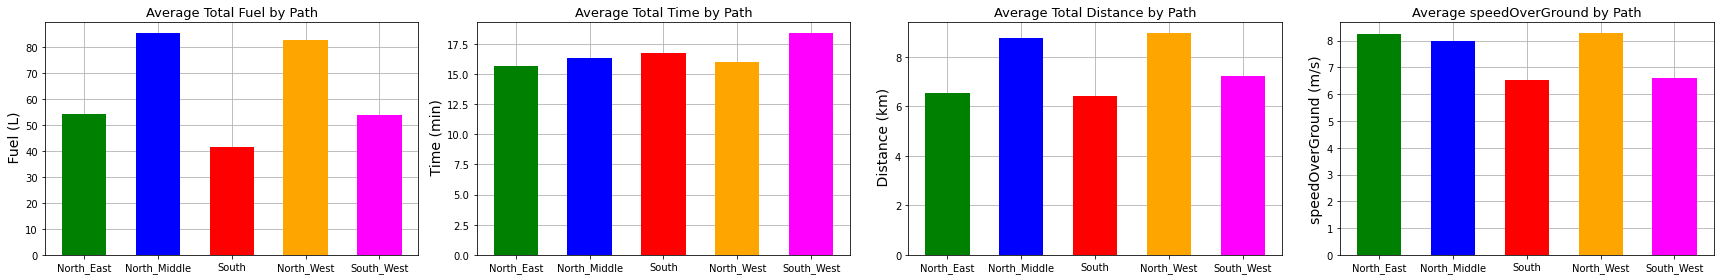

In [39]:
import matplotlib.pyplot as plt

# Create a list of the columns to plot
columns_to_plot = ['fuel_total', 'time_total', 'distance_total', 'SOG_avg']

Labels_head = ['Total Fuel', 'Total Time', 'Total Distance', 'speedOverGround']
Labels_axis = [' Fuel (L)', ' Time (min)', ' Distance (km)', 'speedOverGround (m/s)']


# Define colors for each path class
color_labels=['red', 'blue', 'green', 'orange', 'magenta']
class_labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

colors = {class_label: color_label for class_label, color_label in zip(class_labels, color_labels)}

# Create subplots
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(24, 4))

# Iterate over the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    # Get unique classes in the 'direction' column
    classes = df_ftds['direction'].unique()
    
    # Get data for each class in the column
    data = [df_ftds[df_ftds['direction'] == cls][column] for cls in classes]
    
    # Plot the bar plot for the current column
    axs[i].bar(classes, [d.mean() for d in data], color=[colors[cls] for cls in classes], width=0.6, zorder=3)
    axs[i].set_ylabel(column)
    axs[i].set_title('Average '+Labels_head[i]+' by Path', fontsize=13)

    axs[i].set_ylabel(Labels_axis[i], fontsize=14)
    axs[i].grid()


# Adjust spacing between subplots
plt.tight_layout()
plt.savefig(Output_folder+'/Barplot_avg_fuel_dist_time_sog_5paths.png', dpi=500)  


plt.show() 


In [40]:
columns_to_plot

['fuel_total', 'time_total', 'distance_total', 'SOG_avg']

In [41]:
df_group = df.groupby('RT_id').agg({'fuel_total': 'last',
                                    'time_total': 'last',
                                    'distance_total': 'last',
                                    'SOG_avg': 'last'})

df_group

,fuel_total,time_total,distance_total,SOG_avg
RT_id,,,,
0.0,137.821208,32.3575,15.666652,8.067228
1.0,128.840917,30.6025,15.539183,8.459014
2.0,136.414417,29.9900,15.277701,8.487511
3.0,136.144708,30.9450,15.424831,8.301968
4.0,128.987958,30.2400,15.470310,8.523548
...,...,...,...,...
119.0,79.362861,34.1800,13.135494,6.413434
120.0,70.914083,34.7275,13.109098,6.295219
121.0,67.344639,34.9550,13.201288,6.302756


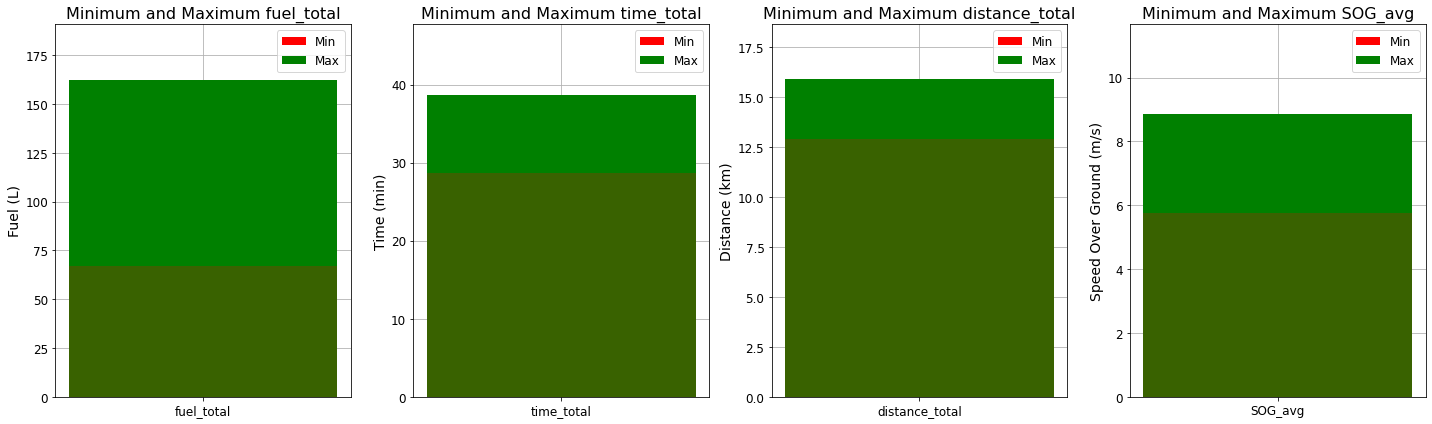

In [42]:
import matplotlib.pyplot as plt

Labels_head = ['Total Fuel', 'Total Time', 'Total Distance', 'Speed Over Ground']
Labels_axis = ['Fuel (L)', 'Time (min)', 'Distance (km)', 'Speed Over Ground (m/s)']

# Get the column names
columns = ['fuel_total', 'time_total', 'distance_total', 'SOG_avg']

# Create subplots
fig, axs = plt.subplots(1, len(columns), figsize=(20, 6))

# Iterate over the columns and plot
for i, column in enumerate(columns):
    ax = axs[i]
    values = df_group[column]
    x = [column]

    ax.bar(x, [values.min()], label='Min', color='red', width=0.6, zorder=3)
    ax.bar(x, [values.max()], label='Max', color='green', width=0.6, zorder=3)

    # Add the min and max bars beside each other
    ax.bar(x, [values.min(), values.max()], color=['red', 'green'], alpha=0.65, width=0.6, zorder=3)

    ax.set_xlabel('', fontsize=14)  # Set the column name as x-label with fontsize
    ax.set_ylabel(Labels_axis[i], fontsize=14)  # Set y-label with fontsize
    ax.set_title(f'Minimum and Maximum {column}', fontsize=16)  # Set title with fontsize
    ax.grid()
    ax.legend(fontsize=12)  # Set legend fontsize

    # Adjust y-axis limit
    if column=='fuel_total':
            ylim_max = values.max() + 0.3 * (values.max() - values.min())
    else:
        ylim_max = values.max() + 0.9 * (values.max() - values.min())
    ax.set_ylim(0, ylim_max)

    # Set fontsize for tick labels
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig(Output_folder+'/Barplot_minmax_fuel_dist_time_sog_5paths.png', dpi=500)  


plt.show() 


In [43]:
# st=stop

### Representing and Plotting the Paths as Average Values 

In [44]:
# df.Path_class.unique()
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

In [45]:
from sklearn.metrics import pairwise_distances

groups = ['North_East', 'North_Middle', 'South', 'North_West', 'South_West']
centroid_5paths_df = dforig.groupby(['RT_id']).mean()
centroids_5paths = centroid_5paths_df[['latitude', 'longitude']].values
dispersion_5paths_df = dforig.groupby(['RT_id']).std()
dispersion_5paths = dispersion_5paths_df[['latitude', 'longitude']].values
distances_5paths  = pairwise_distances(centroid_5paths_df[['latitude', 'longitude']], centroids_5paths)
min_indices_5paths  = distances_5paths.argmin(axis=1)
distances_5paths.shape

(124, 124)

In [46]:
# Convert the distances_train # train_df.groupby(['RT_id']).mean()
rts_list=dforig.groupby('RT_id')['direction'].first()
# df_class_disp=dforig.groupby('RT_id')['direction'].first()
df_class_disp = rts_list

df_distance_5paths = pd.DataFrame(distances_5paths, index=df_class_disp, columns=df_class_disp)

# Rename the index and column names
df_distance_5paths.index.name = ''
df_distance_5paths.columns.name = ''

df_centroids_5paths = pd.DataFrame({'RT_id':df_class_disp.index, 'latitude':centroids_5paths[:,0], 'longitude':centroids_5paths[:,1],
                                   'lat_dispersion':dispersion_5paths[:,0], 'lon_dispersion':dispersion_5paths[:,1]}, index=df_class_disp)
df_distance_5paths = pd.concat([df_centroids_5paths, df_distance_5paths], axis=1)
# Print the DataFrame
df_distance_5paths.round(4)


,RT_id,latitude,longitude,lat_dispersion,lon_dispersion,North_East,North_Middle,North_East,North_Middle,North_East,...,South,South,South,South,South,South,South,South,South,South
North_East,0.0,59.4222,18.4308,0.0133,0.0655,0.0000,0.0042,0.0013,0.0020,0.0019,...,0.0057,0.0086,0.0080,0.0070,0.0061,0.0092,0.0097,0.0056,0.0060,0.0067
North_Middle,1.0,59.4229,18.4267,0.0133,0.0670,0.0042,0.0000,0.0032,0.0023,0.0032,...,0.0079,0.0125,0.0118,0.0106,0.0094,0.0131,0.0137,0.0083,0.0093,0.0103
North_East,2.0,59.4217,18.4297,0.0127,0.0654,0.0013,0.0032,0.0000,0.0015,0.0007,...,0.0054,0.0093,0.0086,0.0075,0.0064,0.0099,0.0105,0.0056,0.0063,0.0072
North_Middle,3.0,59.4230,18.4290,0.0133,0.0668,0.0020,0.0023,0.0015,0.0000,0.0019,...,0.0069,0.0105,0.0099,0.0089,0.0078,0.0112,0.0117,0.0070,0.0078,0.0085
North_East,4.0,59.4211,18.4293,0.0131,0.0671,0.0019,0.0032,0.0007,0.0019,0.0000,...,0.0050,0.0093,0.0086,0.0074,0.0062,0.0099,0.0105,0.0052,0.0062,0.0071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South,119.0,59.4165,18.4381,0.0074,0.0652,0.0092,0.0131,0.0099,0.0112,0.0099,...,0.0066,0.0008,0.0013,0.0026,0.0041,0.0000,0.0011,0.0057,0.0041,0.0030
South,120.0,59.4171,18.4391,0.0073,0.0639,0.0097,0.0137,0.0105,0.0117,0.0105,...,0.0076,0.0013,0.0021,0.0036,0.0051,0.0011,0.0000,0.0067,0.0050,0.0039
South,121.0,59.4168,18.4324,0.0072,0.0638,0.0056,0.0083,0.0056,0.0070,0.0052,...,0.0009,0.0055,0.0046,0.0031,0.0016,0.0057,0.0067,0.0000,0.0017,0.0028
South,122.0,59.4171,18.4341,0.0071,0.0628,0.0060,0.0093,0.0063,0.0078,0.0062,...,0.0026,0.0038,0.0030,0.0015,0.0001,0.0041,0.0050,0.0017,0.0000,0.0012


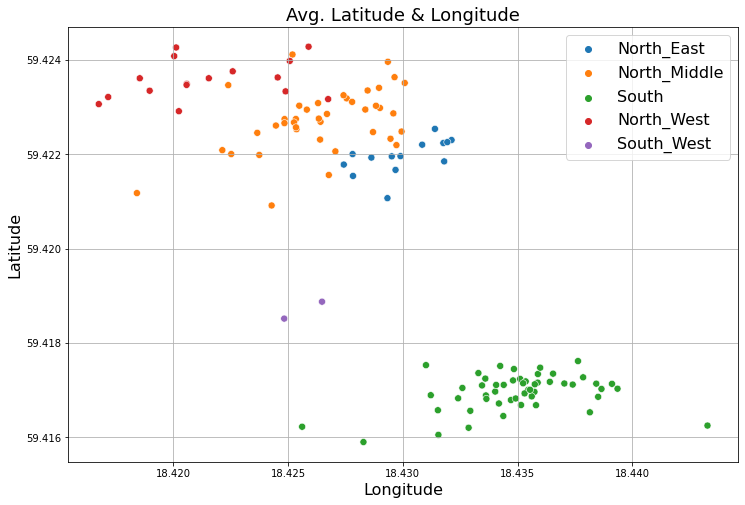

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

df_distance_5paths['rt_class']=df_distance_5paths.index


# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))


# color_map = {'North_East': 'red', 'North_Middle': 'blue', 'South': 'green', 'North_West':'cyan', 'South_West':'orange', }
# sns.scatterplot(x=df_distance_5paths['longitude'], y=df_distance_5paths['latitude'], hue='rt_class',
#                 data=df_distance_5paths, legend='full', s=50, palette=color_map)

sns.scatterplot(x=df_distance_5paths['longitude'], y=df_distance_5paths['latitude'], hue='rt_class',
                data=df_distance_5paths, legend='full', s=50)

# Add labels for each point
# for i, row in df_distance_5paths.iterrows():
#     ax.annotate(row.RT_id, (row['longitude']+0.0001, row['latitude']+0.0001), fontsize=8)


# Set number format for axis ticks
ax.ticklabel_format(useOffset=False, style='plain')

# Add title and labels
plt.title('Avg. Latitude & Longitude', fontsize=18)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.legend(fontsize=16)
plt.grid()

plt.savefig(Output_folder+'/Plots_all_cetroids_5paths.png', dpi=500)  

plt.show()


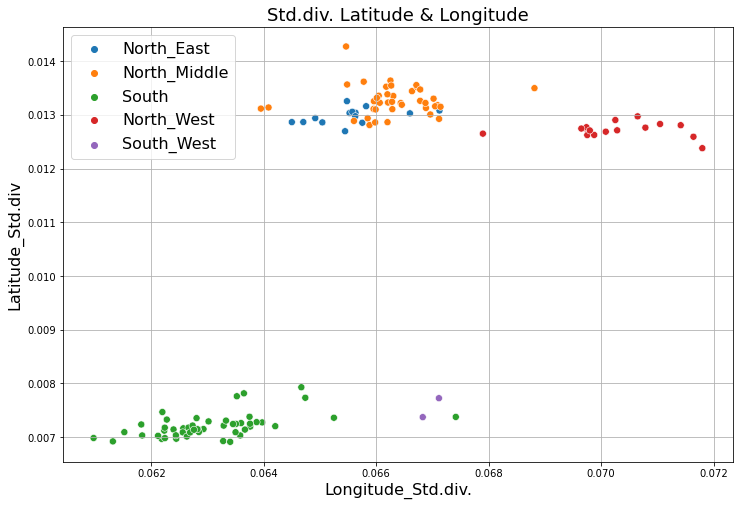

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

df_distance_5paths['rt_class']=df_distance_5paths.index


# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# color_map = {'North_East': 'red', 'North_Middle': 'blue', 'South': 'green', 'North_West':'cyan', 'South_West':'orange', }
# sns.scatterplot(x=df_distance_5paths['longitude'], y=df_distance_5paths['latitude'], hue='rt_class',
#                 data=df_distance_5paths, legend='full', s=50, palette=color_map)


sns.scatterplot(x=df_distance_5paths['lon_dispersion'], y=df_distance_5paths['lat_dispersion'], hue='rt_class',
                data=df_distance_5paths, legend='full', s=50)

# Add labels for each point
# for i, row in df_distance_5paths.iterrows():
#     ax.annotate(row.RT_id, (row['longitude']+0.0001, row['latitude']+0.0001), fontsize=8)


# Set number format for axis ticks
ax.ticklabel_format(useOffset=False, style='plain')

# Add title and labels
plt.title('Std.div. Latitude & Longitude', fontsize=18)
plt.xlabel('Longitude_Std.div.', fontsize=16)
plt.ylabel('Latitude_Std.div', fontsize=16)
plt.legend(fontsize=16)
plt.grid()

plt.savefig(Output_folder+'/Plots_all_dispersions_5paths.png', dpi=500)  

plt.show()


In [49]:
# st=stop

### PCA

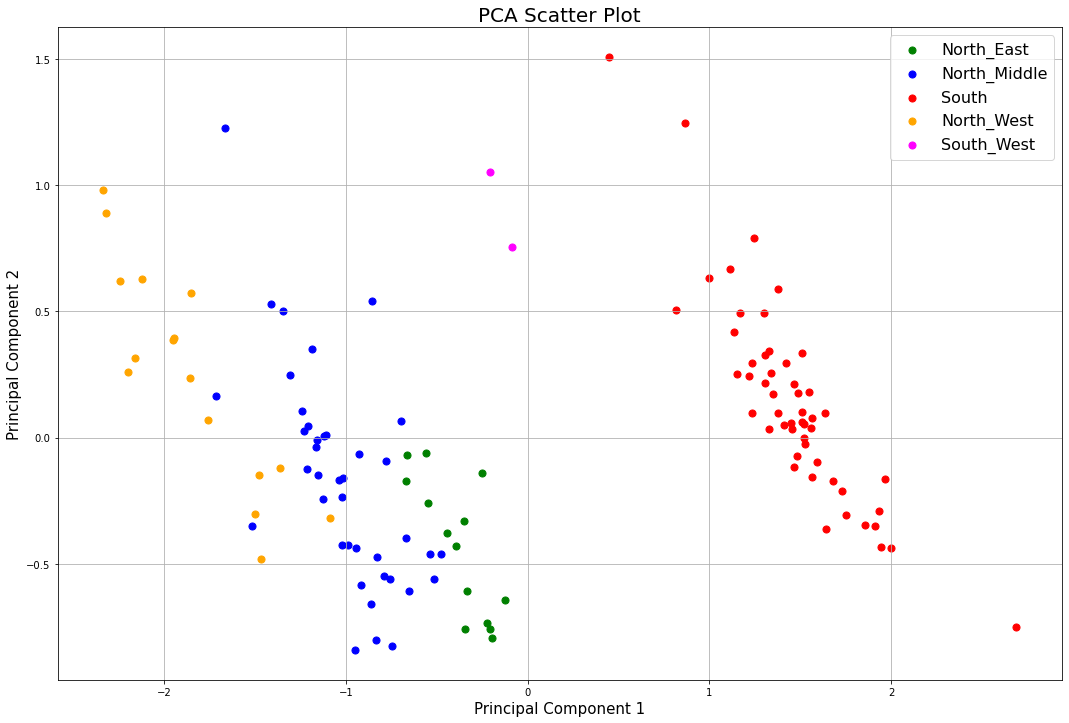

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data into a pandas dataframe

# PCA_input=['day', 'Press_surf', 'swellHeight', 'waveHeight', 'waterTemperature', 'courseOverGroundTrue', 'Temp_2m',
#  'windDirection_sg', 'Temp_surf', 'hour', 'windDirection_cpr', 'month', 'windSpeed_sg', 'windSpeed_cpr',
#  'currentSpeed', 'Precip', 'secondarySwellHeight', 'latitude', 'speedOverGround']; pca_feats='Best_Shaps'

# PCA_input=['latitude', 'longitude', 'hour', 'speedOverGround', 'courseOverGroundTrue',
#             'windSpeed_Onb', 'windDirection_Onb', 'distanceFromDock', 'distanceToNextDock',
#            'waterTemperature', 'waveHeight', 'waveDirection']; pca_feats='ManyFeats'

# PCA_input=['latitude', 'longitude', 'hour', 'speedOverGround', 'courseOverGroundTrue',
#     'distanceFromDock', 'distanceToNextDock']; pca_feats='latlon_hr_sog_cog_dist'

# PCA_input=['latitude', 'longitude', 'hour', 'speedOverGround', 'courseOverGroundTrue']; pca_feats='latlon_hr_sog_cog'

# PCA_input=['latitude', 'longitude', 'hour', 'courseOverGroundTrue']; pca_feats='latlon_hr_cog'

# PCA_input=['latitude', 'longitude', 'hour']; pca_feats='latlon_hr'

PCA_input=['latitude', 'longitude']; pca_feats='lat_lon'



### Extract features for PCA
# X = df[PCA_input].values

df_avg = df.groupby(['RT_id']).mean()
X= df_avg[PCA_input].values


# Standardize the features
X = StandardScaler().fit_transform(X)

# Fit PCA model
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create new dataframe with principal components and 'direction' column
df_pc12 = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
df_pc12['Path_class']=df_distance_5paths.index


# Plot scatter plot
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('PCA Scatter Plot', fontsize=20)
targets = list(df_pc12['Path_class'].unique())
colors = ['g', 'b', 'r', 'orange', 'magenta']
for target, color in zip(targets,colors):
    indicesToKeep = df_pc12['Path_class'] == target
    ax.scatter(df_pc12.loc[indicesToKeep, 'pc1']
               , df_pc12.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets, fontsize=16)
ax.grid()
plt.savefig(Output_folder+'/Plot_PCA_5paths_'+tempo_res+'_'+pca_feats+'.png', dpi=500)  

plt.show()
